## init

import needed packages

In [1]:
import os,json
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import numpy as np
# remove avx warning:
# I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
# To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

from pandas import DataFrame,Series


load testing data (if data not loaded from outside)

In [2]:
# check if IS_MASTER exists, this variable will only exist if it's being called by MASTER notebook.
# if it does not exist, set it to False



try: use_MASTER
except: use_MASTER = False

if not use_MASTER:
    #%run imports.ipynb
    from pathlib import Path
    from sys import path
    
    #pickle,sys
    home = str(Path.home())
    save_add = f'{home}/Dropbox/CyTOF_Breast/data_yishai/'
    
    #add the path were the functions are and load the small dataset (used for testing) and config data
    path.append(f'{home}/Desktop/breast_cancer_PHD_research/functions/')
    # with open(f'{save_add}/Dropbox/CyTOF_Breast/data_yishai/default_data.p', 'rb') as f:
    #   [df,config] = pickle.load(f)
    with open(f'{save_add}default_sample.json', "r") as f:
        _ = DataFrame.from_dict(json.load(f)).reset_index(drop=True)
    with open(f'{save_add}default_config.json', "r") as f:
        config = json.load(f) 
    del f, home,save_add
    
config['dir_data']  ='/Users/yishai/Dropbox/CyTOF_Breast/data_yishai/discrete_Data_/'
print(config['dir_data'])
del config['dir_index'] 

# config['features'] = df.columns.tolist()
config['recalculate_umap'] = True

/Users/yishai/Dropbox/CyTOF_Breast/data_yishai/discrete_Data_/


replace data

## clustering (umap+dbscan)

define clustering class and umap plotting class

In [3]:
from clustering import *
clustering = Clustering(**config)

from plots import *
plot = Plots(**config)#build Umap_dbscan class (either from MASTER or from here) using parent class containg the config data


if not use_MASTER:
    
    
    clustering.get_attribute()#print all attributes (config info)      

The directory already exists!
The directory already exists!
The directory already exists!
j         : b2345a_reduced
feautures_ind: 2
data_folder: Data_
visualize : True
plotUMAP  : True
show      : True
saveSVG   : False
recalculate_umap: True
recalculate_db: True
create_adjusted: False
compare   : False
isSingleSample: False
isCellCycle: False
home      : /Users/yishai
dir_data  : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai/discrete_Data_/
dir_plots : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai/plots/_sample_b2345a_10042024_Data_/
dir_functions: /Users/yishai/Desktop/breast_cancer_PHD_research/functions/
save_add  : /Users/yishai/Dropbox/CyTOF_Breast/data_yishai/
name      : CellIden+EpiCols
title     : sampb2345a_reduced CellIden+EpiCols Based 
figname   : sampb2345a_reduced_CellIden+EpiCols_Based_
features  : ['K5', 'EpCam', 'aSMA', 'Vimentin', 'ER', 'CD49f', 'CD24', 'GATA3', 'CD44', 'K8-18', 'Ki67', 'ECad', 'panKeratin', 'H3K27me2', 'H3K36me2', 'H3K4me1', 'H3K9me2', 'H4K16ac

generate multiple datasets with diffrent size, mean & variance (same number of columns)


In [4]:
features = 30
data= [np.random.normal(loc=40*i,scale=i,size=(1000*i,features)) for i in range( 10)]

plot concatination of all data and its corresponding umap


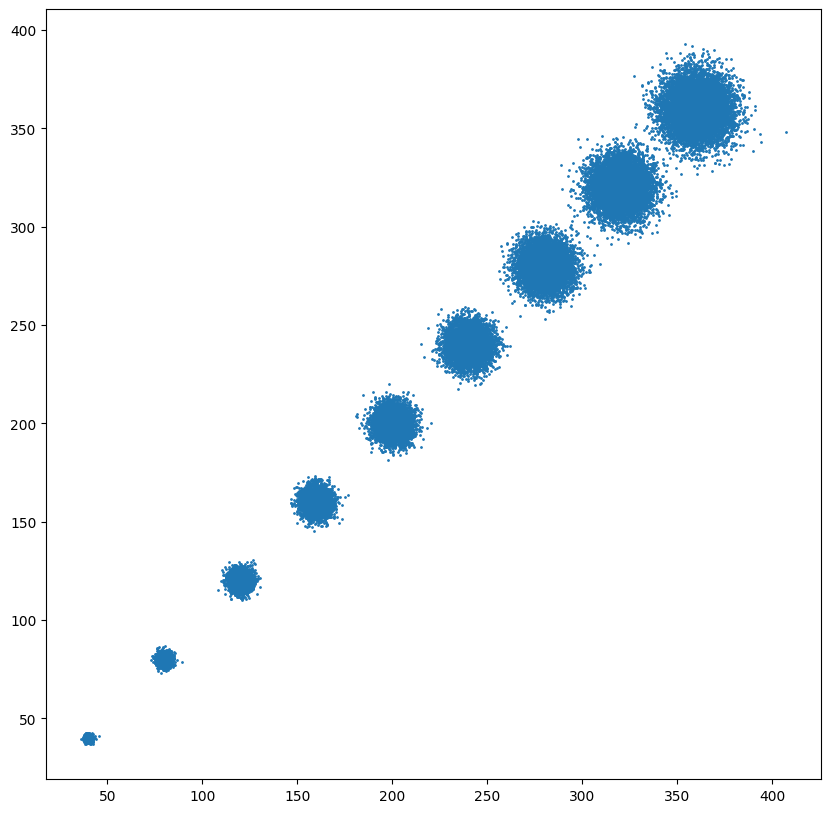

In [5]:



df = DataFrame(np.concatenate(data,axis=0),columns=[f'f{i}' for i in range(30)])
len(df)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(df['f0'],df['f1'],s=1)

/Users/yishai/Desktop/breast_cancer_PHD_research/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


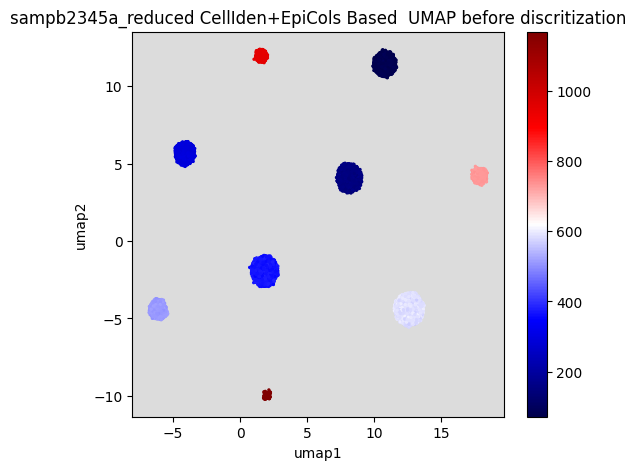

In [6]:

from umap import UMAP
params = [0.1,10]

umapData = UMAP( n_neighbors=int(params[1]), min_dist=params[0],# verbose=True,
            n_components=2, metric='euclidean', random_state=42,  densmap=False,).fit_transform(df.copy(),)
umapData = DataFrame(umapData, columns=['umap1', 'umap2'])    
intensity = np.sqrt(np.square(df-np.mean(df,axis=0)).sum(axis=1))
# intensity = (intensity - intensity.min())/(intensity.max()-intensity.min())
# intensity = df['H4'].copy(),
plot.umap(umapData,intensity,
            title = f'{config["title"]} UMAP before discritization',
            
            figname = '1_'+config["figname"]+'UMAP_(core)')
    
        

    
    


after discritization

1000


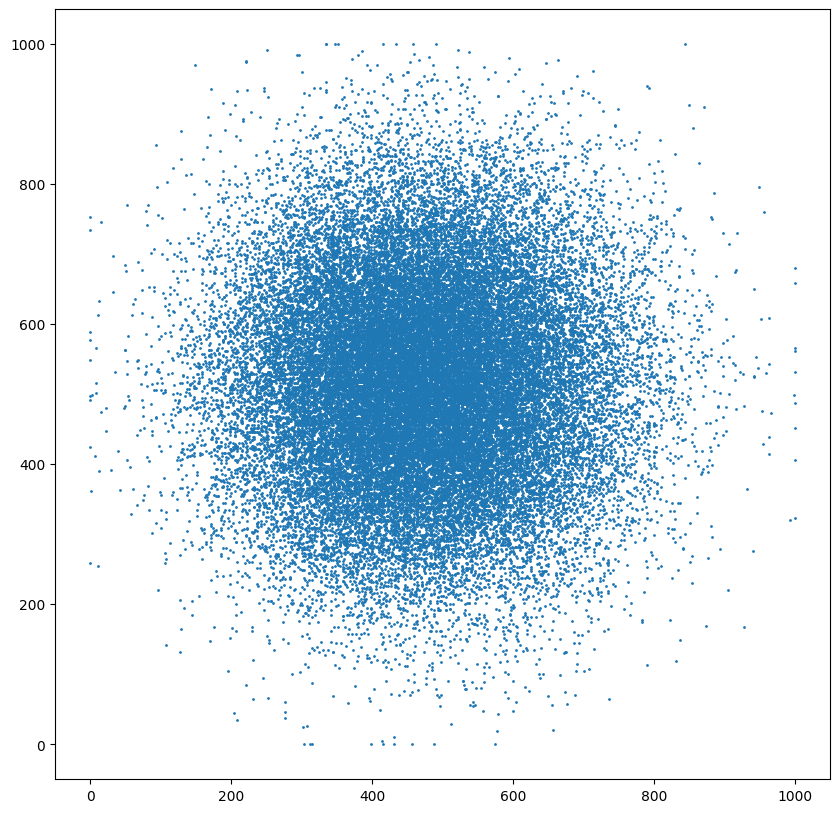

In [7]:
from sklearn.preprocessing import KBinsDiscretizer
def discretize(data =[]):
    '''
    :param data: list of dataframes/arrays to discretize
    
    strategty:‘uniform’- All bins in each feature have identical widths.
    
    n_bins the number of bins to produce - limited by the array with the minimal length 
    :return: array with the discretized data

    '''
    data = [d for d in data if d.shape[0]>0]
    n_bins = min([data[i].shape[0] for i in range(len(data)) ])
    print(n_bins)

    estimators = []
    for i in range(len(data)):
        estimators.append(KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform', subsample=None))
    df_t = DataFrame(np.concatenate([estimators[i].fit_transform(data[i]) for i in  range(len(data))],axis=0))
                    #  columns=[f'f{i}' for i in range(30)])

    return df_t   
        


df_t = discretize(data)
# df_t.columns=[f'f{i}' for i in range(30)]
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(df_t[0],df_t[1],s=1)

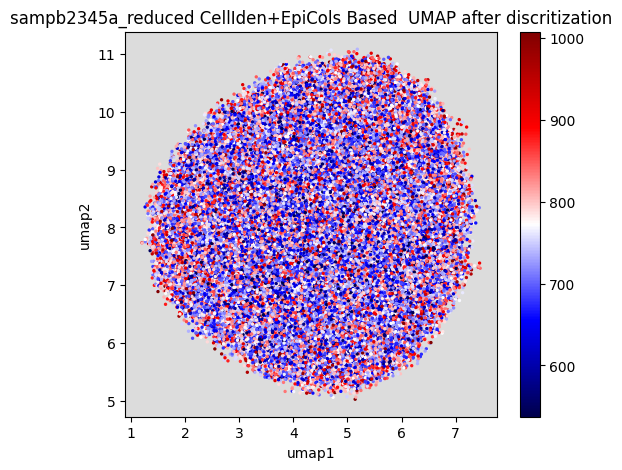

In [8]:

from umap import UMAP
params = [0.1,10]

umapData = UMAP( n_neighbors=int(params[1]), min_dist=params[0],# verbose=True,
            n_components=2, metric='euclidean', random_state=42,  densmap=False,).fit_transform(df_t.copy(),)
umapData = DataFrame(umapData, columns=['umap1', 'umap2'])    
intensity = np.sqrt(np.square(df_t-np.mean(df_t,axis=0)).sum(axis=1))
# intensity = (intensity - intensity.min())/(intensity.max()-intensity.min())
# intensity = df['H4'].copy(),
plot.umap(umapData,intensity,
            title = f'{config["title"]} UMAP after discritization',
            
            figname = '1_'+config["figname"]+'UMAP_(core)')
    
        

    
    
